In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
path = '../../data/result/topics_after_reducing_4_7_topics.csv'
data = pd.read_csv(path)

In [3]:
data.head()

,column,text,topic_id,topic_name
0,like,- dr. emad is a professional in everything (ex...,1,دكتور المقرر
1,improve_course,- إعطاء مشاريع صغيرة بدلا من مشروع كبير-يكون ا...,6,طريقة تدريس و تقديم المادة
2,improve_course,- التركيز على إعطاء الطلبة خلفية جيدة عن تعلم ...,6,طريقة تدريس و تقديم المادة
3,add_suggestions,- عمل منهج واضح بالنسبة للطلاب ومحدد-إيضاح طري...,6,طريقة تدريس و تقديم المادة
4,like,1-the verity of tools that we used and applied...,1,دكتور المقرر


In [4]:
df = data[data['topic_id']!=-1]

In [5]:
len(data), len(df)

(1610, 1585)

In [6]:
def add_prefix(row):
    col_dict = {
        'like': "أكثر ما أعجبني:",
        'dislike':"أكثر ما لم يعجبني:",
        'improve_course':"اقتراحاتي للتحسين:",
        'add_suggestions': "اقتراحاتي للإضافة:"
    }
    
    col_dict = {k: v.strip() + " " for k, v in col_dict.items()}
    col_name = row['column']
    
    prefix = col_dict[col_name]
    text = prefix + row['text']
    
    return text

In [7]:
df['text'] = df.apply(add_prefix, axis=1)

/tmp/ipykernel_4457/2870868182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df.apply(add_prefix, axis=1)


In [8]:
df.head()

,column,text,topic_id,topic_name
0,like,أكثر ما أعجبني: - dr. emad is a professional i...,1,دكتور المقرر
1,improve_course,اقتراحاتي للتحسين: - إعطاء مشاريع صغيرة بدلا م...,6,طريقة تدريس و تقديم المادة
2,improve_course,اقتراحاتي للتحسين: - التركيز على إعطاء الطلبة ...,6,طريقة تدريس و تقديم المادة
3,add_suggestions,اقتراحاتي للإضافة: - عمل منهج واضح بالنسبة للط...,6,طريقة تدريس و تقديم المادة
4,like,أكثر ما أعجبني: 1-the verity of tools that we ...,1,دكتور المقرر


In [9]:
random_state = 42

In [10]:
test_size = 0.4

train_df, val_test_df = train_test_split(df, test_size=test_size, stratify=df['topic_id'], 
                                         random_state=random_state, shuffle=True)

In [11]:
len(train_df), len(val_test_df)

(951, 634)

<Axes: >

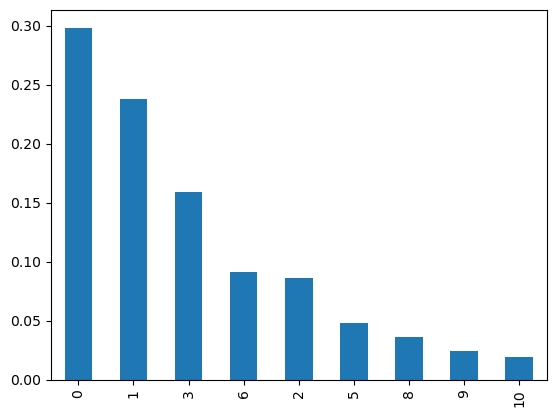

In [12]:
(train_df.topic_id.value_counts()/len(train_df)).plot(kind='bar')

<Axes: >

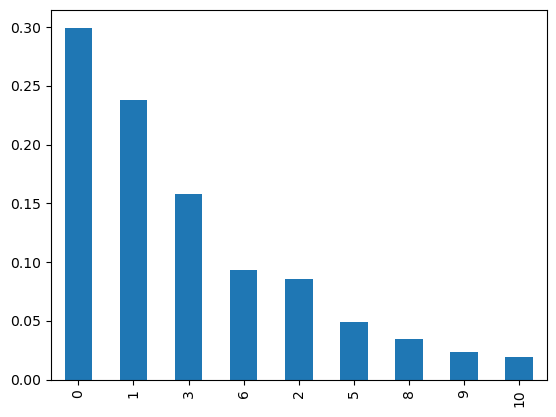

In [13]:
(val_test_df.topic_id.value_counts()/len(val_test_df)).plot(kind='bar')

In [14]:
train_df.head()

,column,text,topic_id,topic_name
475,like,أكثر ما أعجبني: التطبيق العملي المحدث والمشابه...,3,موازنة الجزء العملي مع الجزء النظري
496,improve_course,اقتراحاتي للتحسين: التطبيق والبعد عن التدريس ا...,3,موازنة الجزء العملي مع الجزء النظري
162,like,أكثر ما أعجبني: the content,0,محتوى ومعلومات المقرر
142,improve_course,اقتراحاتي للتحسين: provide more new books,3,موازنة الجزء العملي مع الجزء النظري
1137,improve_course,اقتراحاتي للتحسين: زيادة ساعات العملي,8,الوقت و الجدول


In [15]:
val_test_df.head()

,column,text,topic_id,topic_name
686,like,أكثر ما أعجبني: المقرر ساعدني جدا في فهم نظام ...,1,دكتور المقرر
699,dislike,أكثر ما لم يعجبني: المقرر يحتوي على مواضيع ساب...,6,طريقة تدريس و تقديم المادة
286,dislike,أكثر ما لم يعجبني: أسلوب شرح المقرر,5,المتطلبات و المهام و الدرجات
51,add_suggestions,اقتراحاتي للإضافة: everything is spectacular a...,2,None
1482,like,أكثر ما أعجبني: معلمة المادة متمكنة وتستجيب عل...,1,دكتور المقرر


In [16]:
train_df.to_csv('../../data/result/train_df.csv', index=False)
val_test_df.to_csv('../../data/result/test_df.csv', index=False)

In [17]:
df.column.value_counts()

like               769
add_suggestions    292
dislike            272
improve_course     252
Name: column, dtype: int64

In [18]:
train_df.column.value_counts()

like               452
dislike            174
improve_course     163
add_suggestions    162
Name: column, dtype: int64

In [19]:
val_test_df.column.value_counts()

like               317
add_suggestions    130
dislike             98
improve_course      89
Name: column, dtype: int64

In [20]:
len(val_test_df)

634